In [1]:
import player_streaks

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Streaks
When I'm watching a basketball game, sometimes it seems like a certain player just can't miss a shot. Every shot looks like it's going to go in. Other times, it seems like they just can't make a shot. This phenomenon is known as the "hot hand" and whether it exists or not has been debated for decades, even as it's taken for granted in the common language around sports. Announcers will say that a player is  "heating up", or, "that was a heat check".

As a fan of the game, it certainly seems like the hot hand exists, at least for some players. If you follow basketball, some names probably come to mind. JR Smith, Danny Green, Dion Waiters, Jamal Crawford. Sometimes it seems like those guys just couldn't miss. 

It's a thing we collectively believe in, but when subject to rigorous statistical analysis, the hot hand doesn't seem to exist. At the very least, it's been the subject of debate for a long time.

We have to be careful with our feelings about the hot hand. It certainly feels real, but that doesn't mean that it is. Within the drama of a basketball game, we're more likely to notice and assign stories to runs of makes or misses. Just because we notice them, that doesn't mean they're significant. This is sometimes called "the law of small numbers" -- our brains are very good at generalization from a small amount of data.

## A Thought Experiment

Imagine I asked you to try and randomly write a sequence of "W"'s and "L"'s to simulate a team's win-loss record. I could probably tell that it was fake. You might get the winning percentage correct, but your results would probably be less "streaky" than an actual sequence of winners. [Joseph Buchdal](https://www.football-data.co.uk/blog/Wald_Wolfowitz.php) found that he couldn't create a win-loss record by hand that would fool a statistical test called the Wald-Wolfowitz test, even though he knew exactly how the statistical test works.

Streaks of wins and losses in randomly generated data follow regular mathematical laws, ones our brains don't want to follow when asked to do the exercise. At some level, we're almost physically incapable of generating truly random data, so it makes sense to me that our intuitions about randomness are a little off. Our brains are wired to notice the streaks, but we seem to have no such circuitry for noticing when something is a little bit too un-streaky. Our brains are too quick to see meaningless patterns in small amounts of data, and not clever enough to see subtle, meaningful patterns in large amounts of data. That's why we have statistics!

## Defining Streakiness
For the sake of this discussion, a streak starts whenever a sequence of outcomes changes from wins (W) to losses (L), or vice-versa. (I'm talking about makes and misses, but those start with the same letter, so I'll use "W" and "L".)

The sequence "WLWLWL" has 6 streaks: `W, L, W, L, W, L`        
The sequence "WWLLLW" has 3 streaks: `WW, LLL, W`

If I asked you to make up a random-looking string of 3 W's and 3 L's, which one is more likely to be your answer?

If they were making the results up, I think the average person would be more likely to write the first string. It just looks "more random", right? 

If they flipped a coin, it would be more likely to produce something with longer streaks, like the second example. With a fair coin, both of those *exact* sequences are equally likely to occur. But the second sequence has a more probable number of streaks, according to the [Wald-Wolfowitz Runs Test](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test). The expected number of streaks in 3 wins and 3 losses is (2 * (3 * 3) / (3+3)) + 1 = 4.

That number is equal to the [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of the number of wins and the number of losses, plus one. I don't think there's any deep mathematical reason why that's true, just how the algebra shakes out. But it's still kinda neat!

Around 500 players attempted a shot in the NBA this season. Let's say we create a custom coin for each player. It comes up heads with the same percentage as the player's shooting percentage on the season. If we took those coins and simulated every shot in the NBA this season, some of the coins would inevitably appear to be "streakier" than others. 

Likewise, if we look at the shooting records of 500 players in an NBA season, some will seem more or less consistent due to random variance. So it's important to remember that a player with longer streaks than expected could just be due to chance, not due to the player actively doing something that makes them more streaky.

We might call players who have fewer streaks than expected by chance *consistent*. Maybe they go exactly 5 for 10 every single game, never being especially good or especially bad. Or maybe they go 1 for 3 every game, always being pretty bad.

But that feels like the wrong word, and I don't think our brains aren't really wired to notice a player that has fewer streaks than average.  I might notice a player is unusually consistent after the fact when looking at their basketball-reference page, but the feeling of a player having the *hot hand* is visceral, experienced in the moment. Even without consulting the box score, sometimes players look like they just can't miss, or can't make, a shot. They seem more confident, or their shot seems more natural, than usual. Both the shooter and the spectator seem to have a higher expectation that the shot will go in than usual. It is a social phenomenon.

The big question is whether players are basically just random number generators or not. (Of course, there's an [xkcd about that](https://xkcd.com/904/)). If we look at the makes and misses of every player in the league, do they look like the results of flipping a coin (weighted to match their shooting percentage), or is there a tendency for players to be more or less streaky than expected by chance? 

While the *consistent hand*, or *lukewarm hand* isn't a thing we would viscerally notice the way we do the *hot hand*, it's certainly possible to exist. And it's just as surprising, from the perspective of treating basketball players like weighted coins. Some people I've seen analyze the hot hand that treat it as *streaky* versus *non-streaky*. But it's not a binary things. There are two possible extremes, and a region in between. It's *unusually streaky* versus *normal amount of streaky* versus *unusually non-streaky*.

The Wald-Wolfowitz test says that the number of streaks in randomly-generated data will be normally distributed, and gives a formula for the variance in number of streaks.

The normal distribution is symmetrical, so there should be as many *hot hand* players as *lukewarm hand* ones. Players have varying numbers of shots taken over the course of the season so we can't compare them directly, but we can calculate the z score for each player's expected vs. actual number of streaks using Wald-Wolfowitz. The z score represents how "weird" the player is. If we look at all the z-scores together, we can see whether NBA players as a whole are streakier or less streaky than chance alone would predict.

### Simplifying Assumptions
We should start with the assumption that athletes really are weighted random number generators. A coin might have "good days" and "bad days" based on the results, but it's not because the coin is "in the zone" one day, or a little injured the next day. At least some of the variance in a player's streakiness is due to randomness, so we have to be looking for effects that can't be explained by randomness alone.

So I am analyzing all shots a player took, across all games. This could cause problems, which I will discuss later on, but splitting the results up game-by-game or week-by-week leads to other problems. The smaller sample sizes mean more sampling error. High volume shooters will have less sampling error than low-volume shooters. This can easily be misinterpreted.

I think we should prove that *streakiness* (beyond what's expected due to random variance) exists before making assumptions about how it works. If a player makes a bunch of shots in a row, how long might that effect carry over? Does it last through halftime? Does it carry over to the next game? How many makes in a row before they "heat up"? There are an infinite number of ways to model how it could work, which means it's ripe for overfitting. So I wanted to start with the simplest, most easily justifiable model.

There's no good reason to invent some homegrown metric for "streakiness" under this assumption. The Wald-Wolfowitz test is the correct one to use here. The [original paper about the hot hand](https://www.sciencedirect.com/science/article/abs/pii/0010028585900106?via%3Dihub) was co-written by Amos Tversky, who won a Nobel Prize. Any time you can copy off of a Nobel Prize winner's homework, you probably should!

In [ ]:
sp = player_streaks.PlayerStreaks()

df = sp.get_data_with_stats()
df

,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score
player_id,,,,,,,,,
1630173,Precious Achiuwa,164,163,157,WLLLWWLWWLLWLLWLLLWWWWWLLLWLLWWLLLWLLLWWWLWLWW...,164.498471,81.497704,9.027608,-0.830615
203500,Steven Adams,91,76,87,LWWWLLWLWWWLWLLLWWWLWWWWWLLWWWWLWLLWWWLWLWLWWW...,83.826347,40.827575,6.389646,0.496687
1628389,Bam Adebayo,540,573,569,LLWLWWWLWLWWWLLWLLWLWWWLWLWWWWLWWWLLWWWLWLLWWL...,557.010782,277.510772,16.658655,0.719699
1630534,Ochai Agbaji,266,268,277,WLLLLWLWLWWLWLLLLWLLLLLWLLLWWWWWLWWWLWWWWWLLWL...,267.996255,133.245786,11.543214,0.780003
1630583,Santi Aldama,313,335,327,LWLLLLWLWWWWWLWWWLWWLWLWLLLWWWWWWLWWWLWWWWWWLL...,324.626543,161.376372,12.703400,0.186836
...,...,...,...,...,...,...,...,...,...
1629027,Trae Young,566,810,678,LLWLLLLWLWLLLLWLWLLWLWWLLWLLLWWWLLWLWWWLWLWLWW...,667.366279,322.456474,17.957073,0.592175
1627826,Ivica Zubac,592,350,445,WLWLLLLWLWWWLWLWWWWWLWWWWWLLWLLWLLLWWWWLWWWWLL...,440.915074,205.191666,14.324513,0.285170
1641783,Tristan da Silva,199,284,245,LWLWLLLLWLWWLWLWWLWLWLLWWLWWWWLWLWWLLLLWLWWLLW...,235.020704,113.136243,10.636552,0.938208


In [5]:
df.loc[203500]

player_name                                              Steven Adams
makes                                                              91
misses                                                             76
total_streaks                                                      87
raw_data            LWWWLLWLWWWLWLLLWWWLWWWWWLLWWWWLWLLWWWLWLWLWWW...
expected_streaks                                            83.826347
variance                                                    40.827575
sd                                                           6.389646
z_score                                                      0.496687
Name: 203500, dtype: object

### Results

Here is a histogram of the z-scores for the players, with the expected distribution plotted over the top. A player with a tendency for the *hot hand* would have fewer streaks than expected, and a negative z-score. 

I'm going to call the opposite tendency the *lukewarm hand*. A player with this tendency would have more streaks, which means shorter streaks than expected, and a positive z-score. They're like somebody trying to fake a random sequence of makes and misses, and alternating too often between "W" and "L" more often than flipping a coin would. If they just wrote a "W", they're more likely to write an "L" next than they should be, and vice versa.

The histogram of z-scores looks a bit skewed to the right. In other words, there are actually fewer players with the *hot hand* tendency than expected by chance, or alternately, more players with the *lukewarm hand*.


*Lukewarm hand* = More streaks = shorter average streak length = less streaky = higher z-score.    
*Hot hand* = Fewer streaks = longer average streak length = more streaky = lower z-score.

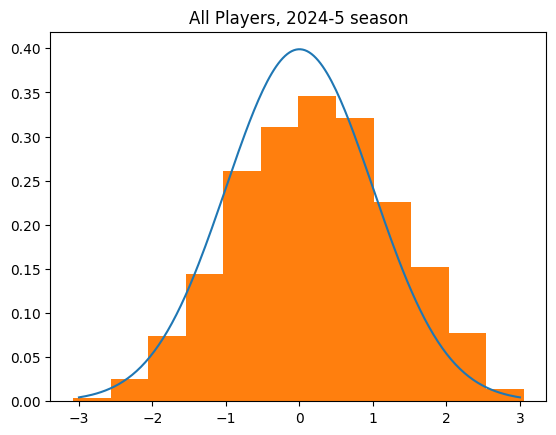

In [10]:
x = np.linspace(-3,3,200)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 1))
plt.title("All Players, 2024-5 season")
out = plt.hist(df.z_score, bins=12, density=True)

In [ ]:
df.z_score.describe()

count    554.000000
mean       0.212491
std        1.075563
min       -3.081194
25%       -0.546340
50%        0.236554
75%        0.951653
max        3.054836
Name: z_score, dtype: float64

Here's the Q-Q plot. The theoretical versus actual values follow the straight line pretty closely. So the outcomes are fairly normal.

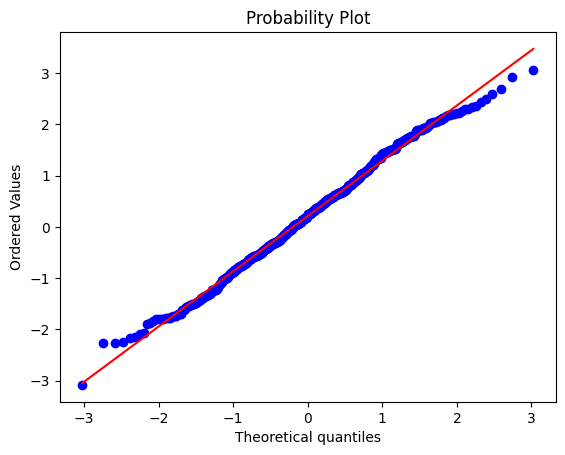

In [ ]:
out = scipy.stats.probplot(df.z_score, dist='norm', plot=plt)

We can formally check this with the Shapiro-Wilk test. The p-value is > .05, meaning we can't reject the assumption that this data came from a normal distribution.

In [ ]:
scipy.stats.shapiro(df.z_score).pvalue

np.float64(0.0745736416255809)

So based on the shot data for every player from the 2024-25 NBA regular season, there is no conclusive evidence that players in general are streakier or less streaky than predicted by chance. This data could've come from flipping a bunch of coins.

There are significantly more players with the *lukewarm hand* than the *hot hand*, though, and the actual data looks a little skewed to the right. What might be causing that?

In [ ]:
sum(df.z_score > 0)

320

In [ ]:
sum(df.z_score < 0)

232

### Outliers?

Players vary widely in the number of shots taken, so perhaps some outliers are affecting the results.

Here are the number of made shots by each player. There are 552 players total, and over 200 of them have fewer than 87 makes.

[  0. 100. 200. 300. 400. 500. 600. 700. 800.]


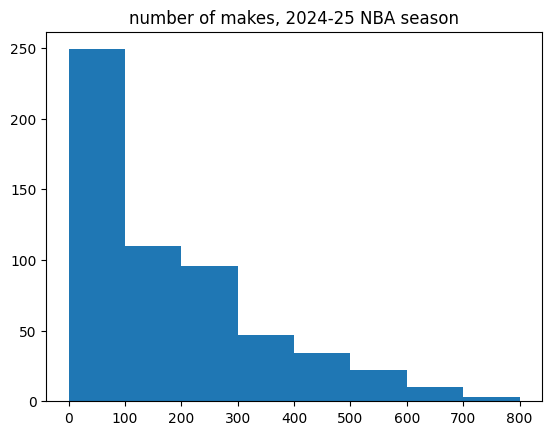

In [14]:
out = plt.hist(df.makes, bins=[100*x for x in range(0,9)])
plt.title("number of makes, 2024-25 NBA season")

print(out[1])

For simplicity, I'm going to throw out all players that have fewer than 100 makes. That leaves 323 players.

In [16]:
df_minus_outliers = df[df.makes > 100].copy()

In [17]:
len(df_minus_outliers)

323

Text(0.5, 1.0, '> 100 makes, 2024-5')

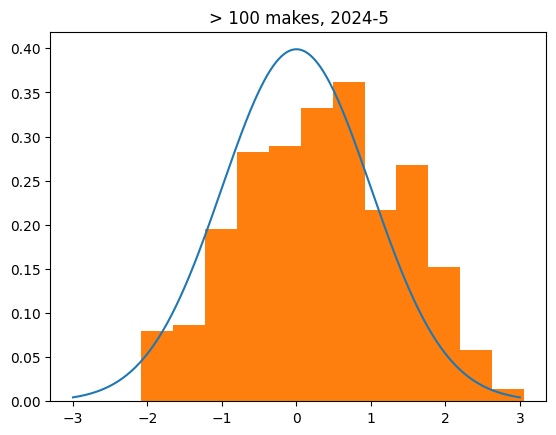

In [20]:
x = np.linspace(-3,3,200)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 1))
out = plt.hist(df_minus_outliers.z_score, bins=12, density=True)
plt.title("> 100 makes, 2024-5")

Well, that's surprising! The z-scores look even more skewed to the right after removing the outliers. According to Shapiro-Wilk, it's no longer plausible this data came from a normal distribution.

In [ ]:
scipy.stats.shapiro(df_minus_outliers.z_score).pvalue

np.float64(0.029588990161310183)

The smallest z-score is now -2.08 while the largest is 3.05. The mean is .35 when we'd expect it to be 0.

In [ ]:
df_minus_outliers.z_score.describe()

count    323.000000
mean       0.347452
std        1.068341
min       -2.082528
25%       -0.454794
50%        0.363949
75%        1.091244
max        3.054836
Name: z_score, dtype: float64

There are a lot more players with an abnormally high z-score than an abnormally low one.

In [ ]:
sum(df_minus_outliers.z_score < -2)

2

In [ ]:
sum(df_minus_outliers.z_score > 2)

20

## Huh?

That was definitely not what I was expecting.

Maybe looking at the actual players will lend some clarity. Here are the *lukewarm hands*, players who are more consistent (have fewer streaks) than expected by chance.

In [ ]:
lukewarm_hands = df_minus_outliers.loc[df_minus_outliers.z_score > 2].copy()
lukewarm_hands[["player_name", "makes", "z_score"]].sort_values("z_score", ascending=False)

,player_name,makes,z_score
player_id,,,
1631099,Keegan Murray,364,3.054836
1631101,Shaedon Sharpe,499,2.922887
1629731,Dean Wade,112,2.582368
1627783,Pascal Siakam,613,2.495422
1630527,Brandon Boston,166,2.363133
203507,Giannis Antetokounmpo,793,2.327921
1630224,Jalen Green,608,2.297122
1630526,Jeremiah Robinson-Earl,158,2.263668
203944,Julius Randle,455,2.218991


In [ ]:
sum(df.makes > 500) / len(df)

0.06498194945848375

In [ ]:
sum(lukewarm_hands.makes > 500) / len(lukewarm_hands)

0.3

Some of the most prolific scorers in the league are on this list, and high scorers are over-represented. 6% of all NBA players made more than 500 shots this year, but 30% of the *lukewarm hands* players did.

From a basketball perspective, this list doesn't make much sense. Kevin Durant and Steph Curry are two of the greatest shooters of all time, so it's not at all surprising to see them on a list of shooting outliers. But many of the other names are surprising. The biggest outliers, Keegan Murray and Shaedon Sharpe, aren't anything special as shooters. They didn't have especially standout seasons.

Some of them seem totally wrong and weird. Cam Thomas, Jalen Green, Brandon Ingram and Jordan Poole are generally thought of streaky, inconsistent players. Sometimes they're on, sometimes they're off. Yet, according to their z-scores, they're less streaky than 97.5% of the NBA! That definitely goes against the conventional wisdom.

So perhaps some players truly have the *lukewarm hand*, and others are just on here due to chance. Let's look in the other direction. Who are the players most likely to have a *hot hand*, if such a thing exists?

In [ ]:
df_minus_outliers[df_minus_outliers.z_score < -2][["player_name", "makes", "z_score"]]

,player_name,makes,z_score
player_id,,,
1629048,Goga Bitadze,207,-2.082528
1628418,Thomas Bryant,163,-2.064522


Neither of these guys match my naive conception of a streaky shooter. Both of them are backup big guys who aren't known for their offense, averaging around 7 points a game.

## What Does it All Mean?

Does the *lukewarm hand* mean "clutch"? Not really; a streaky player could be more *clutch* than a consistent player. It just depends on whether they go on a streak of makes or a streak of misses in clutch time. Can a *streaky* player control when they're in the zone? Obviously, they can't always do that, or why wouldn't they do that all the time? It feels like "clutchness" is different from streakiness or not.

I also don't think the *lukewarm hand* means "consistent" the way fans use it. As a fan, a consistent player always seems to have a good game. They never seem to take nights off. But a player with the *lukewarm hand* could have a high shooting percentage, or a low one. They could be a star, or a scrub.

The fact that I'm combining games together in one long sequence might partially explain why we're not seeing evidence for the *hot hand*.

If there is a hot hand effect, the chance of a make is higher than average when the previous shot was a make, and lower if it was a miss. That might be true within a game, but I wouldn't expect the hot hand to carry over from one game to the next. If a player made the last shot of the previous game, then didn't play for 2 days, why should that have an effect on whether they make the first shot of the next game? 

Under the hot hand assumption, low volume shooters should be less likely to have unexpectedly long streaks either way. They don't take enough shots in a game to really *heat up* or *go cold*.  The breaks between games are potentially resetting the streak the player was on when the game ended.

So, it might make sense if low-volume shooters were artificially skewed towards the *lukewarm hand*, but that's not the case. The outliers I removed (under 100 shot attempts on the season) are much closer to a standard normal distribution than the higher volume shooters.

Here are the low volume shooters on their own:

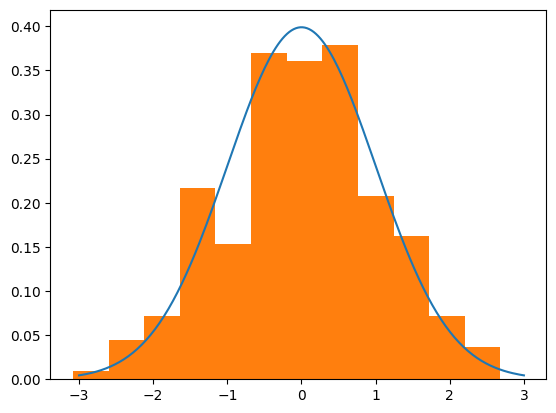

In [ ]:
df_outliers = df[df.makes <= 100]

x = np.linspace(-3,3,200)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 1))
out = plt.hist(df_outliers.z_score, bins=12, density=True)

They look very normal.

In [ ]:
df_outliers.z_score.describe()

count    231.000000
mean       0.023781
std        1.059338
min       -3.081194
25%       -0.604073
50%        0.044682
75%        0.671576
max        2.683367
Name: z_score, dtype: float64

In [ ]:
scipy.stats.shapiro(df_outliers.z_score).pvalue

np.float64(0.7067444075965392)

### Non-streakiness goes up with number of makes

Here's a plot of number of makes on the season versus the z-score, for all NBA players. The more shots a player made this season, the less streaky they tended to be.

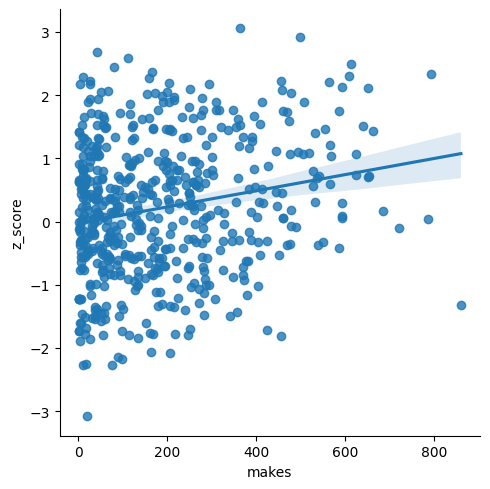

In [ ]:
sns.lmplot(df, x='makes', y="z_score")

In [ ]:
df.makes.corr(df.z_score)

np.float64(0.20276032784481346)

## Justifying the Lukewarm Hand

From a non-math perspective, you could say "of course a player who shoots the ball more is going to be more consistent." That seems pretty reasonable. Certainly the more shots they take, the closer their shooting percentage for the game will be to their overall shooting percentage. But that doesn't say anything about the order of makes and misses. Shouldn't those be random, at least over a long enough time frame?

The *lukewarm hand* might seem silly, but there's more evidence that it exists than the hot hand. If the reality of the hot hand isn't there, why is the perception? I think it's due to how human beings perceive patterns. High volume shooters are more likely to be in a situation where they've hit, say, 5 shots in a row in the same game (or missed 5 in a row). People watching the game are more likely to remember that the player hit/missed a bunch of shots in a row (or a short period of time) and think of them as streaky for that reason.

If a player is less streaky than chance would dictate, there must be some artificial mechanism that makes a player less likely to make a shot if they've on a long streak of makes, and less likely to miss a shot after a long streak of misses.

It can't just go in one direction. If a player that makes 50% of their shots overall is a streaky player, then if they're making 70% of their shots when they're on a "hot streak", there has to be other "cold streaks" where they're making way less than 50% of their shots, right? Or perhaps, they shoot slightly less than 50% all the time, except for when they're on a hot streak. It has to balance out somehow.

### Being Charitable

I stand by the assumption that basketball players should behave like (weighted) coin flips when it comes to streakiness or makes and misses. If the players are less streaky than a random process, that indicates the shooter has some control over the process. They are doing something to break these streaks. They are artificially shortening them, either shooting a little better than average when they're on a streak of misses, or shooting a little worse than average when they're on a streak of makes.

A shooter that is as streaky as a coin has potentially maximized how much of the process they can control. Whether it's a make or a miss is totally random. And by and large, that's what we see. 

The less streaky the player is, the less random the outcomes are, and the more the shooter is interfering with the expression of their natural level of skill. That could apply to streaky shooters as well. Their own psychology is changing what should be a random process. Sometimes they are capable of shooting the ball with superhuman skill, sometimes they are not. It's a weird thing to believe that a person could really make every single shot if they were just in the right mindset. It's much more charitable to assume that players are making a good faith effort to make every shot, and they don't have 100% control over the outcome.

The "lukewarm hand" is a different way of seeing the world than the hot hand hypothesis. Like all models, it's wrong, but I think it's useful, as a different way of thinking about the problem. The reaction to Tversky's original paper concluding the hot hand doesn't exist was for people to try and prove it using different methods, rather than acknowledging that the hot hand is a phenomenon that we subjectively experience. 

The hot hand isn't something that *has to be* real just because we experience it. We also experience paraidolea, the tendency to see human faces in inanimate objects, like rocks and tortillas. Our brains are just wired that way. 3 or 4 makes in a row is enough to make us feel like the shooter might never miss again. We are inclined to draw conclusions from very small sample sizes.

Somebody looking for proof of the hot hand should acknowledge that the *lukewarm hand* is also potentially a thing, even if it's something we don't instinctively experience. Since totally random outcomes will seem streaky, we need to be mistrustful of our experience of the hot hand.


### Next Steps

I'll look at previous seasons -- have the same players been *lukewarm hands* in the past? It could be that 2024-25 was a weird season. And I will look at what streak lengths look like compared to flipping a coin.